# ----------------------------------------------
## 1. Lowercasing
## 2. Special Character Removal
## 3. Stopword Removal
## 4. Tokenization

# ---------------------------------------------------

In [27]:
import pandas as pd
import nltk
import re
import sys
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import pickle

# Add the directory containing preprocessing.py to the system path
sys.path.append('C:\\xampp\\htdocs\\pronalysis\\public\\model')

# Import the data function from the preprocessing module
from preprocessing import data

nltk.download('punkt')

# Function to remove emojis from text
def remove_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile(
           "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\u2600-\u26FF\u2700-\u27BF"  # Other symbols
            u"\u2B50"  # Star emoji
            u"\u200D"  # Zero Width Joiner (ZWJ)
            u"\u20E3"  # Combining Enclosing Keycap
            u"\uFE0F"  # Variation Selector-16 (VS16)
            u"\uDBBA\uDF9A"  # Additional emoticons
            "]+",
            re.UNICODE,
        )
        return re.sub(emoji_pattern, '', text)
    else:
        return text

# Load English stop words
with open('english_words.txt', 'r') as file:
    stop_words = file.read().splitlines()

# Load Tagalog stop words and combine with English stop words
with open('tagalog_stop_words.txt', 'r') as file:
    tagalog_words = file.read().splitlines()
stop_words.extend(tagalog_words)

# Read data from Excel
df = pd.read_excel('brands.xlsx')
df.dropna(inplace=True)
df['Comments_processed'] = df['Comments'].apply(data)
df['Comments_processed'] = df['Comments_processed'].apply(remove_emojis)

min_category_size = df['Category'].value_counts().min()
df = df.groupby('Category').apply(lambda x: x.sample(min_category_size)).reset_index(drop=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
df

,Comments,Category,Comments_processed
0,Zara stores in general give me the ick. Someho...,negative,"[zara, stores, in, general, give, me, the, ick..."
1,ZARA OUT,negative,"[zara, out]"
2,CLOSED ZARA,negative,"[closed, zara]"
3,I flipping hate any light coloured dress that ...,negative,"[i, flipping, hate, any, light, coloured, dres..."
4,ours is not slaying like this,negative,"[ours, is, not, slaying, like, this]"
...,...,...,...
8326,if anyone likes those trousers banan republic ...,positive,"[if, anyone, likes, those, trousers, banan, re..."
8327,Code for thé cardigan plssss,positive,"[code, for, th, cardigan, plssss]"
8328,grabe gagandaa!,positive,"[grabe, gagandaa]"
8329,shop for me please,positive,"[shop, for, me, please]"


In [32]:
category_counts = df['Category'].value_counts()
print(category_counts)

negative    2777
neutral     2777
positive    2777
Name: Category, dtype: int64


In [5]:
#Print number of vocabulary/words
print(len(bow_transformer.vocabulary_))

6464



# Create CountVectorizer model

In [33]:
df['Comments'] = df['Comments_processed']
bow_transformer = CountVectorizer(analyzer=data).fit(df['Comments'])
print(len(bow_transformer.vocabulary_))

6807


In [34]:
# Train-test split
comments_train, comments_test, category_train, category_test = train_test_split(
    df['Comments'], df['Category'], test_size=0.3, random_state=42
)



# Create and train the SVM model

In [180]:
text_clf_svm = Pipeline([
    ('vect', CountVectorizer(analyzer=data)),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss='squared_hinge', penalty='elasticnet', alpha=1e-3, random_state=42)),
])

In [181]:
text_clf_svm.fit(comments_train, category_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function data at 0x00000284E5CBECA0>)),
                ('tfidf', TfidfTransformer()),
                ('clf-svm',
                 SGDClassifier(alpha=0.001, loss='squared_hinge',
                               penalty='elasticnet', random_state=42))])

In [182]:
from sklearn.metrics import classification_report
#predict the test article
prediction=text_clf_svm.predict(comments_test)

In [183]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [184]:
print(report)

              precision    recall  f1-score   support

    negative       0.75      0.77      0.76       852
     neutral       0.67      0.73      0.70       822
    positive       0.78      0.69      0.73       826

    accuracy                           0.73      2500
   macro avg       0.74      0.73      0.73      2500
weighted avg       0.74      0.73      0.73      2500



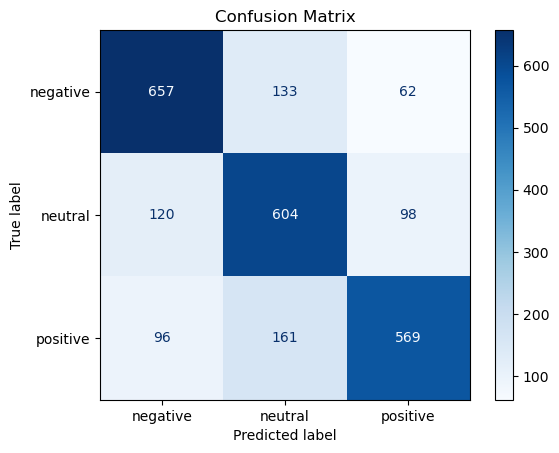

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
predicted = text_clf_svm.predict(comments_test)

# Generate confusion matrix
cm = confusion_matrix(category_test, predicted)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [43]:
input_text = ""  

if input_text.strip():  
    prediction = text_clf_svm.predict([input_text])[0]
    print(prediction)
else:
    print("Input text is empty. Cannot classify.")


Input text is empty. Cannot classify.


# Create and train the KNN model


In [95]:
text_clf_knn = Pipeline([
    ('vect', CountVectorizer(analyzer=data)),
    ('tfidf', TfidfTransformer()),
    ('clf-knn', KNeighborsClassifier(n_neighbors=5)),  
])

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function data at 0x00000284E5CBECA0>)),
                ('tfidf', TfidfTransformer()),
                ('clf-knn', KNeighborsClassifier())])

In [88]:
text_clf_knn.fit(comments_train, category_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function data at 0x00000284E5CBECA0>)),
                ('tfidf', TfidfTransformer()),
                ('clf-knn', KNeighborsClassifier())])

In [89]:
from sklearn.metrics import classification_report
#predict the test article
prediction=text_clf_knn.predict(comments_test)

In [90]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [91]:
print(report)

              precision    recall  f1-score   support

    negative       0.72      0.69      0.71       852
     neutral       0.63      0.68      0.65       822
    positive       0.70      0.69      0.69       826

    accuracy                           0.68      2500
   macro avg       0.69      0.68      0.68      2500
weighted avg       0.69      0.68      0.68      2500



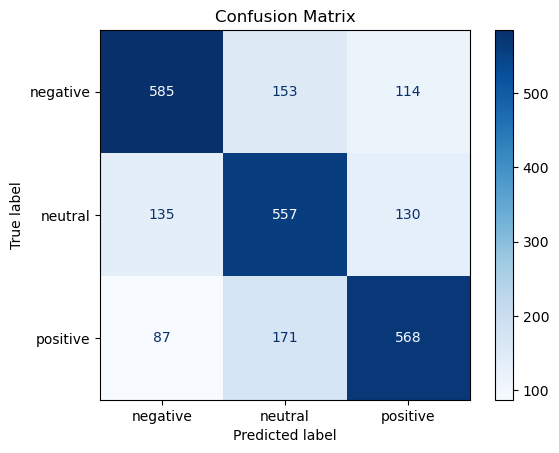

In [54]:
# Make predictions on the test set
predicted = text_clf_knn.predict(comments_test)

# Generate confusion matrix
cm = confusion_matrix(category_test, predicted)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
input_text = ""  

if input_text.strip():  
    prediction = text_clf_svm.predict([input_text])[0]
    print(prediction)
else:
    print("Input text is empty. Cannot classify.")


# Create and train the Naive Bayes model

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

text_clf_nb = Pipeline([
    ('vect', CountVectorizer(analyzer=data)),
    ('tfidf', TfidfTransformer()),
    ('clf-nb', MultinomialNB()),
])



In [82]:
text_clf_nb.fit(comments_train, category_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function data at 0x00000284E5CBECA0>)),
                ('tfidf', TfidfTransformer()), ('clf-nb', MultinomialNB())])

In [83]:
from sklearn.metrics import classification_report
#predict the test article
prediction=text_clf_nb.predict(comments_test)

In [84]:
# Generate a classification report
report = classification_report(category_test, prediction)

In [85]:
print(report)

              precision    recall  f1-score   support

    negative       0.71      0.82      0.76       852
     neutral       0.69      0.70      0.69       822
    positive       0.80      0.66      0.72       826

    accuracy                           0.73      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.73      0.73      0.73      2500



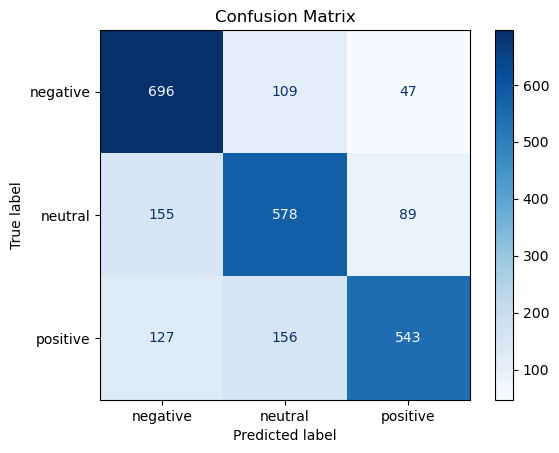

In [86]:
# Make predictions on the test set
predicted = text_clf_nb.predict(comments_test)

# Generate confusion matrix
cm = confusion_matrix(category_test, predicted)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [192]:
input_text = ""  

if input_text.strip():  
    prediction = text_clf_svm.predict([input_text])[0]
    print(prediction)
else:
    print("Input text is empty. Cannot classify.")


neutral


# Save the models

In [ ]:
with open('text_clf_svm.pkl', 'wb') as file:
    pickle.dump(text_clf_svm, file)

with open('text_clf_knn.pkl', 'wb') as file:
    pickle.dump(text_clf_knn, file)

with open('text_clf_nb.pkl', 'wb') as file:
    pickle.dump(text_clf_nb, file)